# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


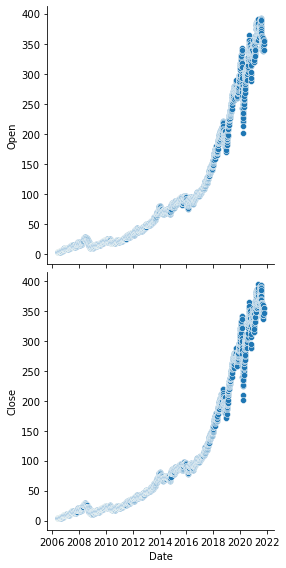

In [9]:
sb.pairplot(stocks_df, x_vars=['Date'], 
             y_vars=['Open','Close'], size=4, aspect=1, kind='scatter')
plt.show()

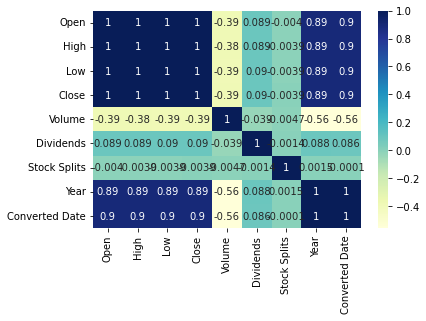

In [11]:
# Visualizing the data using heatmap
sb.heatmap(stocks_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [13]:
# Creating X and y
X = stocks_df['Open']
y = stocks_df['Converted Date']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [15]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [16]:
X_train

2457     84.777597
1540     41.789692
384      18.706097
2560     90.718854
3320    257.031441
           ...    
1930     75.228260
79        6.115560
1859     64.653030
2840    129.994696
1544     39.422718
Name: Open, Length: 2710, dtype: float64

In [17]:
y_train

2457    736024
1540    734690
384     733014
2560    736172
3320    737276
         ...  
1930    735260
79      732572
1859    735155
2840    736578
1544    734696
Name: Converted Date, Length: 2710, dtype: int64

In [18]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    733833.452784
Open         13.606355
dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [20]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Converted Date   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:10:10   Log-Likelihood:                -21665.
No. Observations:                2710   AIC:                         4.333e+04
Df Residuals:                    2708   BIC:                         4.335e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.338e+05     19.436   3.78e+04      0.000    7.34e+05    7.34e+05
Open          13.6064      0.128    106.299      0.000      13.355      13.857
==============================================================================
Omnibus:                      720.188   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.488
Skew:                          -0.296   Prob(JB):                     6.34e-35
Kurtosis:                       1.978   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

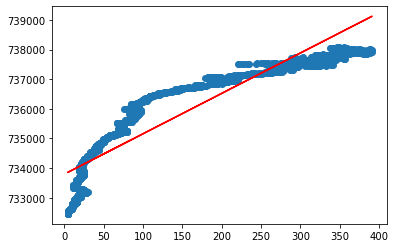

In [21]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.338e+05 + 13.6064*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [22]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


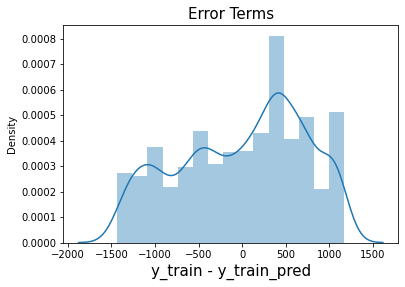

In [24]:
# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

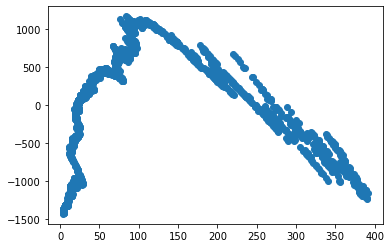

In [25]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?

Yes.R-squared value is 0.8 which is greater than 0.7

2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 

No.The model has specific pattern.So,Can't use linear regression.